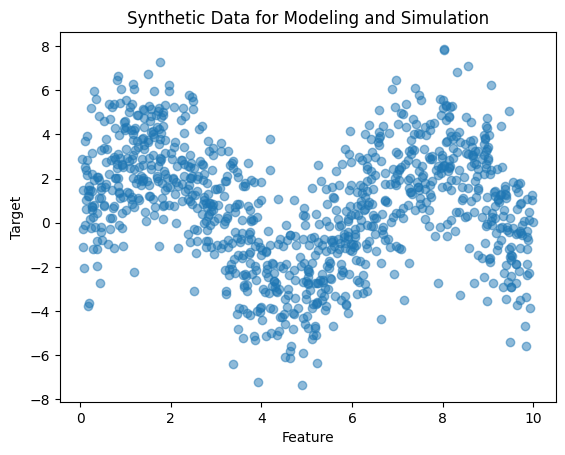

Basic Statistics of the Data:
           Feature       Target
count  1000.000000  1000.000000
mean      4.902566     0.775575
std       2.921374     2.714771
min       0.046320    -7.347988
25%       2.359733    -1.064077
50%       4.968074     0.974681
75%       7.443196     2.676718
max       9.997177     7.868370

Model Evaluation:
Mean Squared Error: 7.9440923430797055


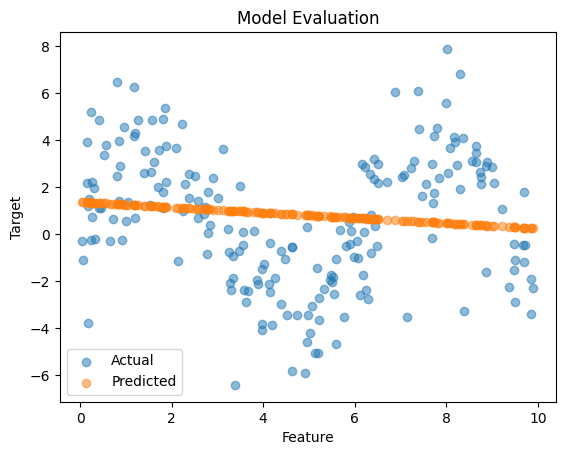


Conclusion:
The linear regression model has been trained and evaluated. Explore further to apply these concepts to your own projects.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 3: Data Generation
# Creating synthetic data with random and scattered properties
np.random.seed(42)

# Generate synthetic features with random values
num_samples = 1000
X = np.random.rand(num_samples, 1) * 10

# Generate synthetic target variable with a non-linear relationship
y = 3 * np.sin(X.squeeze()) + 2 * np.random.randn(num_samples)

# Step 4: Exploratory Data Analysis (EDA)
# Creating a DataFrame for EDA
df = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Visualize the synthetic data
plt.scatter(X, y, alpha=0.5)
plt.title('Synthetic Data for Modeling and Simulation')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

# Display basic statistics of the data
print("Basic Statistics of the Data:")
print(df.describe())

# Step 5: Modeling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 6: Simulation
# Use the model to predict the target variable for the test set
y_pred = model.predict(X_test)

# Step 7: Evaluation and Analysis
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")

# Visualize the model predictions
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred, alpha=0.5, label='Predicted')
plt.title('Model Evaluation')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Step 8: Conclusion
print("\nConclusion:")
print("The linear regression model has been trained and evaluated. Explore further to apply these concepts to your own projects.")


/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

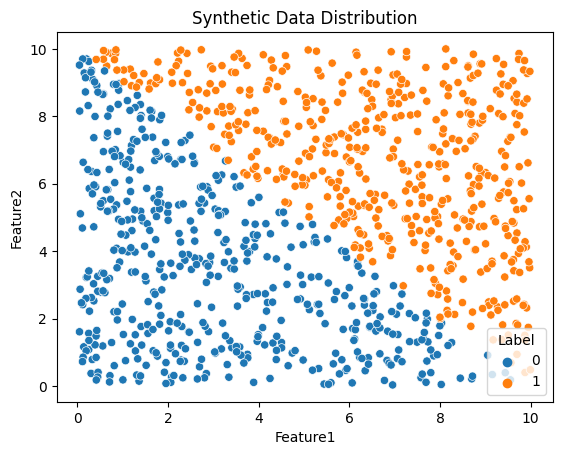

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

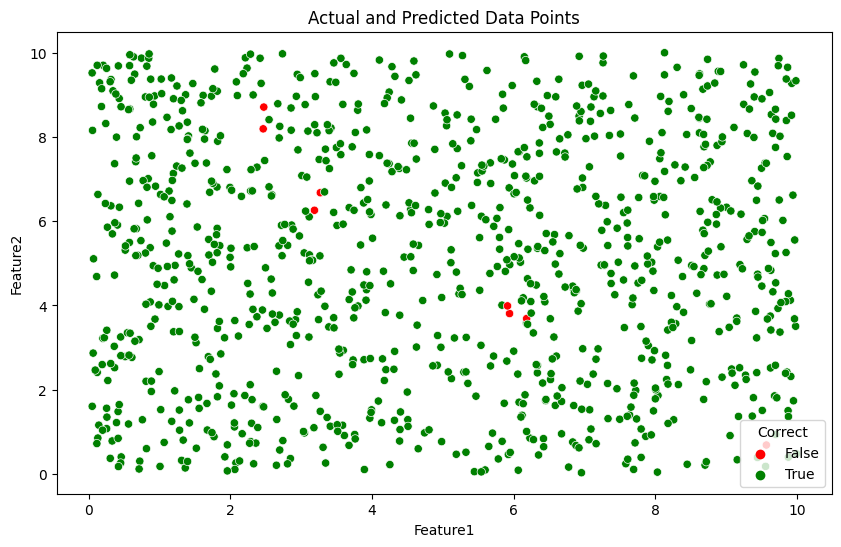

Accuracy: 0.96
Confusion Matrix:
[[101   5]
 [  3  91]]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Data Generation
np.random.seed(42)
num_samples = 1000
features = np.random.rand(num_samples, 2) * 10
labels = (features[:, 0] + features[:, 1] > 10).astype(int)
synthetic_data = pd.DataFrame({'Feature1': features[:, 0], 'Feature2': features[:, 1], 'Label': labels})

# Exploratory Data Analysis (EDA)
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=synthetic_data)
plt.title('Synthetic Data Distribution')
plt.show()

# Modeling
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Simulation
synthetic_predictions = model.predict(X_test)

# Evaluation and Analysis
accuracy = metrics.accuracy_score(y_test, synthetic_predictions)
conf_matrix = metrics.confusion_matrix(y_test, synthetic_predictions)

# Highlight actual and predicted data points
synthetic_data['Prediction'] = model.predict(features)
synthetic_data['Correct'] = synthetic_data['Label'] == synthetic_data['Prediction']

# Plot actual and predicted data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Correct', data=synthetic_data, palette={True: 'green', False: 'red'})
plt.title('Actual and Predicted Data Points')
plt.show()

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

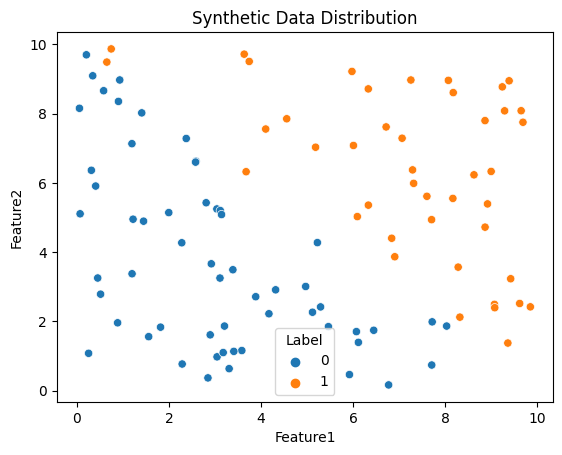

Accuracy: 0.85
Confusion Matrix:
[[10  0]
 [ 3  7]]


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Step 3: Data Generation
# Generate synthetic data with realistic properties
np.random.seed(42)

# Example: Generating synthetic data for a classification problem
num_samples = 100
features = np.random.rand(num_samples, 2) * 10
labels = (features[:, 0] + features[:, 1] > 10).astype(int)

# Create a DataFrame for EDA
synthetic_data = pd.DataFrame({'Feature1': features[:, 0], 'Feature2': features[:, 1], 'Label': labels})

# Step 4: Exploratory Data Analysis (EDA)
# Visualize and analyze the synthetic data
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=synthetic_data)
plt.title('Synthetic Data Distribution')
plt.show()

# Step 5: Modeling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 6: Simulation
# Use the trained model to simulate outcomes
synthetic_predictions = model.predict(X_test)

# Step 7: Evaluation and Analysis
# Evaluate the model performance
accuracy = metrics.accuracy_score(y_test, synthetic_predictions)
conf_matrix = metrics.confusion_matrix(y_test, synthetic_predictions)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 8: Conclusion
# Summarize key points and encourage further exploration

# Optionally, save or display additional visualizations or analysis based on your project requirements



In [13]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set seed 
# np.random.seed(42)

# # Generate features
# num_samples = 1000
# X1 = np.random.uniform(-10, 10, num_samples)
# X2 = np.random.normal(0, 5, num_samples) 

# # Create non-linear transformation
# X1_t = 3*X1**2 + 10*X1 + np.random.normal(0, 3, num_samples)  
# X2_t = np.sin(X2) + np.random.normal(0, 1, num_samples)

# # Generate target based on transformed features
# y = 2*X1_t + 0.5*X2_t + np.random.normal(0, 5, num_samples)

# # Put in dataframe
# data = pd.DataFrame({'X1':X1, 'X2':X2, 'X1_Transformed':X1_t, 
#                      'X2_Transformed':X2_t, 'Target':y}) 

# print(data.head())
# print(data.describe())

   Feature1  Feature2     Target
0  0.496714  2.392784  10.386099
1 -0.138264  0.648105   2.033109
2  0.647689  1.355007   6.570675
3  1.523030  2.399123  13.857620
4 -0.234153  0.229917  -1.676409


/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

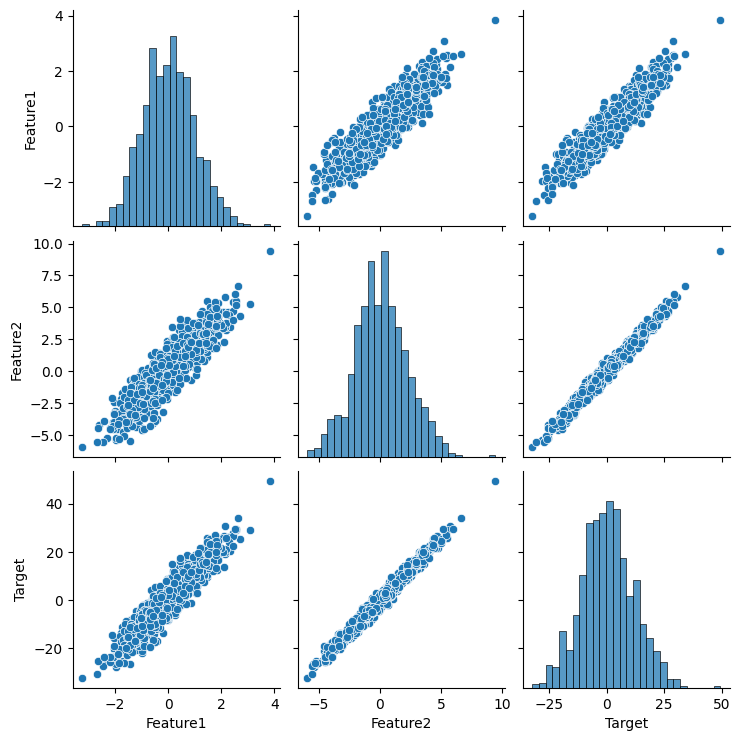

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data with two features and a target variable
num_samples = 1000
feature1 = np.random.normal(0, 1, num_samples)
feature2 = 2 * feature1 + np.random.normal(0, 1, num_samples)
target = 3 * feature1 + 4 * feature2 + np.random.normal(0, 1, num_samples)

# Create a DataFrame to store the data
data = pd.DataFrame({'Feature1': feature1, 'Feature2': feature2, 'Target': target})

# Display the first few rows of the generated data
print(data.head())

# Visualize the data using a pair plot
sns.pairplot(data)
plt.show()


          Feature1     Feature2       Target
count  1000.000000  1000.000000  1000.000000
mean      0.019332     0.109500     0.501832
std       0.979216     2.161604    11.393720
min      -3.241267    -5.943779   -32.263135
25%      -0.647590    -1.302639    -7.319163
50%       0.025301     0.096480     0.128030
75%       0.647944     1.463644     7.732491
max       3.852731     9.455040    49.377645


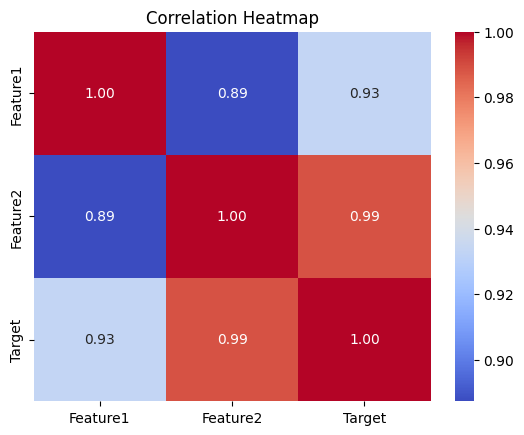

In [15]:
# EDA: Summary statistics
print(data.describe())

# EDA: Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Mean Squared Error: 0.9944982972799647
Model Coefficients:
Feature1: 3.032724177674933
Feature2: 3.9980460616531492


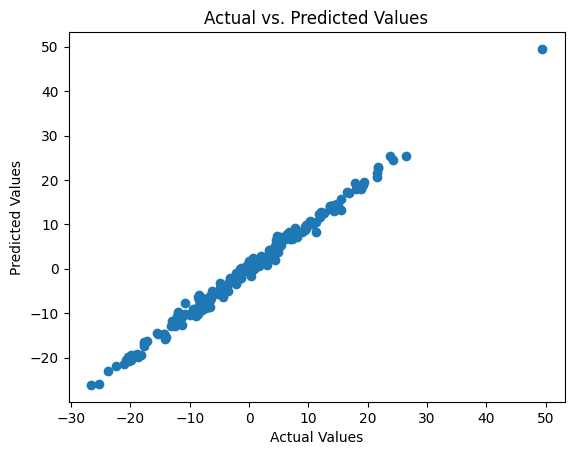

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into features (X) and target variable (y)
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the model coefficients
print('Model Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


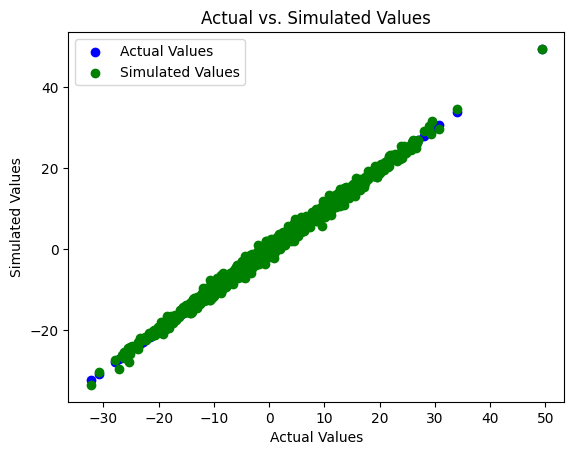

In [20]:
import matplotlib.pyplot as plt

# Simulate outcomes using the trained model
simulated_outcomes = model.predict(X)

# Add the simulated outcomes to the DataFrame
data['Simulated_Outcome'] = simulated_outcomes

# Visualize the actual vs. simulated outcomes with different colors
plt.scatter(data['Target'], data['Target'], color='blue', label='Actual Values')
plt.scatter(data['Target'], data['Simulated_Outcome'], color='green', label='Simulated Values')
plt.xlabel('Actual Values')
plt.ylabel('Simulated Values')
plt.title('Actual vs. Simulated Values')
plt.legend()  # Add legend to distinguish between actual and simulated values
plt.show()


Mean Squared Error for Simulation: 0.9659881772496932


/tmp/ipykernel_78603/1434701633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Target'], label='Actual Outcomes', shade=True)
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_78603/1434701633.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kde

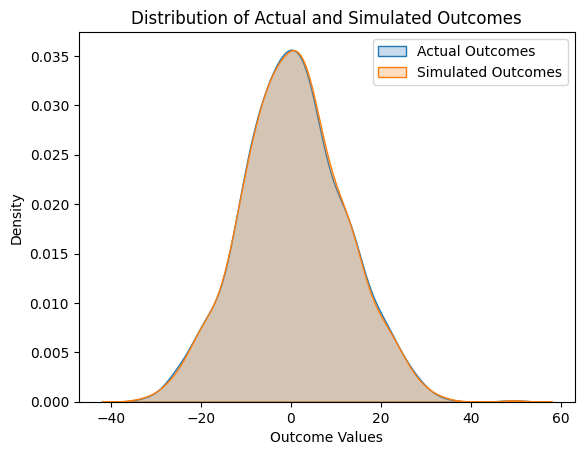

In [18]:
# Evaluate the model performance
mse_simulation = mean_squared_error(data['Target'], data['Simulated_Outcome'])
print(f'Mean Squared Error for Simulation: {mse_simulation}')

# Visualize the distribution of actual and simulated outcomes
sns.kdeplot(data['Target'], label='Actual Outcomes', shade=True)
sns.kdeplot(data['Simulated_Outcome'], label='Simulated Outcomes', shade=True)
plt.xlabel('Outcome Values')
plt.ylabel('Density')
plt.title('Distribution of Actual and Simulated Outcomes')
plt.legend()
plt.show()


In [19]:
# Summary and Conclusion
print("Project Summary:")
print("-" * 50)
print(f"Mean Squared Error for Simulation: {mse_simulation}")

# Additional summary or insights based on your analysis

# Conclusion
print("\nConclusion:")
print("-" * 50)
print("In this project, we explored the concepts of modeling and simulation using Python. We generated synthetic data, performed exploratory data analysis, and applied a simple linear regression model for simulation. The mean squared error for the simulation was calculated, and the distribution of actual and simulated outcomes was visualized. This hands-on experience with Python libraries and tools provides a foundation for further exploration and application of modeling and simulation techniques in various domains.")

# Additional concluding remarks or future directions

# Save the final DataFrame with simulated outcomes if needed
data.to_csv('final_data_with_simulation.csv', index=False)


Project Summary:
--------------------------------------------------
Mean Squared Error for Simulation: 0.9659881772496932

Conclusion:
--------------------------------------------------
In this project, we explored the concepts of modeling and simulation using Python. We generated synthetic data, performed exploratory data analysis, and applied a simple linear regression model for simulation. The mean squared error for the simulation was calculated, and the distribution of actual and simulated outcomes was visualized. This hands-on experience with Python libraries and tools provides a foundation for further exploration and application of modeling and simulation techniques in various domains.
